In [53]:
# pip installnltk

In [54]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [55]:
# Download the VADER lexicon for sentiment analysis if not already present.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
dfcv = pd.read_csv('customer_review.csv')
dfcv.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
1,77,18,2023-12-23,3,Average experience,nothing special.
2,80,19,2024-12-25,5,The quality is top-notch.,NaN
3,50,13,2025-01-26,4,Five stars for the quick delivery.,NaN
4,78,15,2025-04-21,3,Good quality,but could be cheaper.
5,64,2,2023-07-16,3,Average experience,nothing special.


In [57]:
# merge column rating and ReviewText
dfcv['merged_text'] = dfcv['Rating'].astype(str) + ' ' + dfcv['ReviewText'].astype(str)
dfcv.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,merged_text
1,77,18,2023-12-23,3,Average experience,nothing special.,Average experience nothing special.
2,80,19,2024-12-25,5,The quality is top-notch.,NaN,The quality is top-notch. nan
3,50,13,2025-01-26,4,Five stars for the quick delivery.,NaN,Five stars for the quick delivery. nan
4,78,15,2025-04-21,3,Good quality,but could be cheaper.,Good quality but could be cheaper.
5,64,2,2023-07-16,3,Average experience,nothing special.,Average experience nothing special.


In [58]:
dfcv['merged_text'] = dfcv['merged_text'].str.replace('nan', '', regex=False)
dfcv.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,merged_text
1,77,18,2023-12-23,3,Average experience,nothing special.,Average experience nothing special.
2,80,19,2024-12-25,5,The quality is top-notch.,NaN,The quality is top-notch.
3,50,13,2025-01-26,4,Five stars for the quick delivery.,NaN,Five stars for the quick delivery.
4,78,15,2025-04-21,3,Good quality,but could be cheaper.,Good quality but could be cheaper.
5,64,2,2023-07-16,3,Average experience,nothing special.,Average experience nothing special.


In [59]:
# drop column Rating and ReviewText

dfcv = dfcv.drop(['Rating', 'ReviewText'], axis=1)
dfcv.head()


,ReviewID,CustomerID,ProductID,ReviewDate,merged_text
1,77,18,2023-12-23,3,Average experience nothing special.
2,80,19,2024-12-25,5,The quality is top-notch.
3,50,13,2025-01-26,4,Five stars for the quick delivery.
4,78,15,2025-04-21,3,Good quality but could be cheaper.
5,64,2,2023-07-16,3,Average experience nothing special.


In [60]:
print(dfcv.columns)

Index(['ReviewID', 'CustomerID', 'ProductID', 'ReviewDate', 'merged_text'], dtype='object')


In [61]:
# generate a new column as the first column in the dfcv, it will serve as a unique identifier for the table

dfcv.insert(0, 'serial_number', range(1, 1 + len(dfcv)))
dfcv.head()

,serial_number,ReviewID,CustomerID,ProductID,ReviewDate,merged_text
1,1,77,18,2023-12-23,3,Average experience nothing special.
2,2,80,19,2024-12-25,5,The quality is top-notch.
3,3,50,13,2025-01-26,4,Five stars for the quick delivery.
4,4,78,15,2025-04-21,3,Good quality but could be cheaper.
5,5,64,2,2023-07-16,3,Average experience nothing special.


In [62]:
# replace dfcv column names with ReviewID', 'CustomerID', 'ProductID', 'ReviewDate', 'Rating', 'ReviewText',

dfcv.columns = ['ReviewID', 'CustomerID', 'ProductID', 'ReviewDate', 'Rating', 'ReviewText']
dfcv.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
1,1,77,18,2023-12-23,3,Average experience nothing special.
2,2,80,19,2024-12-25,5,The quality is top-notch.
3,3,50,13,2025-01-26,4,Five stars for the quick delivery.
4,4,78,15,2025-04-21,3,Good quality but could be cheaper.
5,5,64,2,2023-07-16,3,Average experience nothing special.


In [63]:
dfcv.isnull().any().any()

np.False_

In [64]:
dfcv.duplicated().any()

np.False_

In [65]:
# Initialize the VADER sentiment intensity analyzer for analyzing the sentiment of text data
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores using VADER
def calculate_sentiment(review):
    # Get the sentiment scores for the review text
    sentiment = sia.polarity_scores(review)
    # Return the compound score, which is a normalized score between -1 (most negative) and 1 (most positive)
    return sentiment['compound']

# Define a function to categorize sentiment using both the sentiment score and the review rating
def categorize_sentiment(score, rating):
    # Use both the text sentiment score and the numerical rating to determine sentiment category
    if score > 0.05:  # Positive sentiment score
        if rating >= 4:
            return 'Positive'  # High rating and positive sentiment
        elif rating == 3:
            return 'Mixed Positive'  # Neutral rating but positive sentiment
        else:
            return 'Mixed Negative'  # Low rating but positive sentiment
    elif score < -0.05:  # Negative sentiment score
        if rating <= 2:
            return 'Negative'  # Low rating and negative sentiment
        elif rating == 3:
            return 'Mixed Negative'  # Neutral rating but negative sentiment
        else:
            return 'Mixed Positive'  # High rating but negative sentiment
    else:  # Neutral sentiment score
        if rating >= 4:
            return 'Positive'  # High rating with neutral sentiment
        elif rating <= 2:
            return 'Negative'  # Low rating with neutral sentiment
        else:
            return 'Neutral'  # Neutral rating and neutral sentiment

# Define a function to bucket sentiment scores into text ranges
def sentiment_bucket(score):
    if score >= 0.5:
        return '0.5 to 1.0'  # Strongly positive sentiment
    elif 0.0 <= score < 0.5:
        return '0.0 to 0.49'  # Mildly positive sentiment
    elif -0.5 <= score < 0.0:
        return '-0.49 to 0.0'  # Mildly negative sentiment
    else:
        return '-1.0 to -0.5'  # Strongly negative sentiment

In [66]:
# Fill missing values in 'ReviewText' with empty strings
dfcv['ReviewText'] = dfcv['ReviewText'].fillna('')

# Apply sentiment analysis to calculate sentiment scores for each review
dfcv['SentimentScore'] = dfcv['ReviewText'].apply(calculate_sentiment)

# Apply sentiment categorization using both text and rating
dfcv['SentimentCategory'] = dfcv.apply(
    lambda row: categorize_sentiment(row['SentimentScore'], row['Rating']), axis=1)

# Apply sentiment bucketing to categorize scores into defined ranges
dfcv['SentimentBucket'] = dfcv['SentimentScore'].apply(sentiment_bucket)

In [67]:
# Display the first few rows of the DataFrame with sentiment scores, categories, and buckets
dfcv.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,SentimentScore,SentimentCategory,SentimentBucket
1,1,77,18,2023-12-23,3,Average experience nothing special.,-0.3089,Mixed Negative,-0.49 to 0.0
2,2,80,19,2024-12-25,5,The quality is top-notch.,0.0000,Positive,0.0 to 0.49
3,3,50,13,2025-01-26,4,Five stars for the quick delivery.,0.0000,Positive,0.0 to 0.49
4,4,78,15,2025-04-21,3,Good quality but could be cheaper.,0.2382,Mixed Positive,0.0 to 0.49
5,5,64,2,2023-07-16,3,Average experience nothing special.,-0.3089,Mixed Negative,-0.49 to 0.0


In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Install wordcloud if not already installed
try:
    from wordcloud import WordCloud
except ImportError:
    !pip install wordcloud
    from wordcloud import WordCloud

# Separate the DataFrame based on SentimentCategory
positive_reviews = dfcv[dfcv['SentimentCategory'] == 'Positive']['ReviewText']
negative_reviews = dfcv[dfcv['SentimentCategory'] == 'Negative']['ReviewText']
neutral_reviews = dfcv[dfcv['SentimentCategory'] == 'Neutral']['ReviewText']
mixed_positive_reviews = dfcv[dfcv['SentimentCategory'] == 'Mixed Positive']['ReviewText']
mixed_negative_reviews = dfcv[dfcv['SentimentCategory'] == 'Mixed Negative']['ReviewText']

def generate_wordcloud(text_series, title):
    """Generates and displays a word cloud from a pandas Series of text."""
    if not text_series.empty:
        text = " ".join(text_series.astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(title)
        plt.show()
    else:
        print(f"No reviews found for {title}")

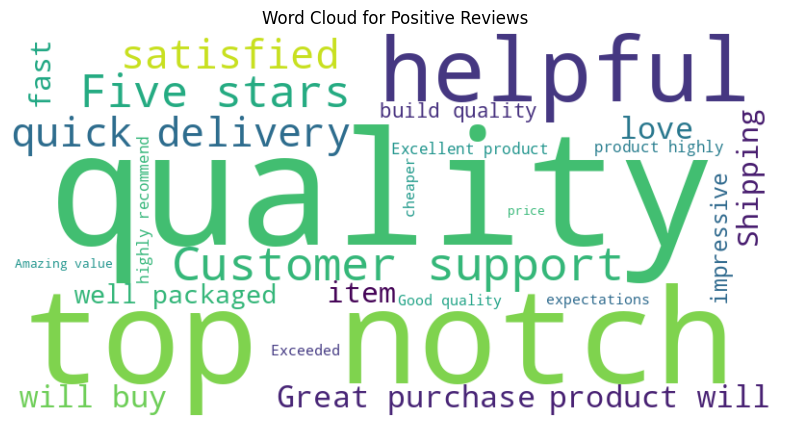

In [69]:
# Positive Reviews Word Cloud
generate_wordcloud(positive_reviews, 'Word Cloud for Positive Reviews')

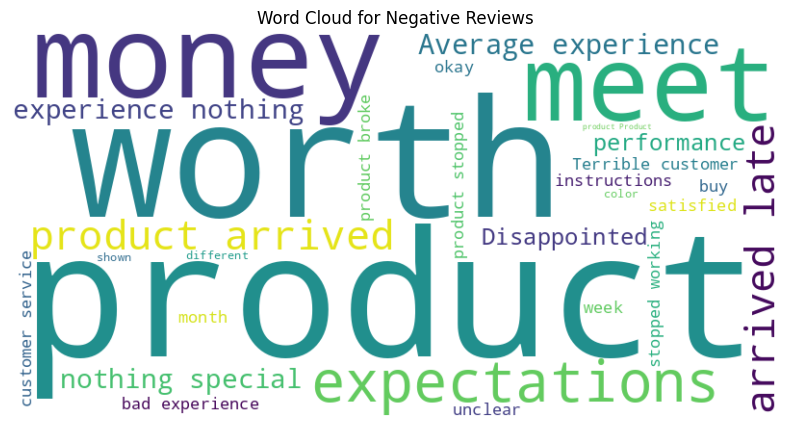

In [70]:
# Negative Reviews Word Cloud
generate_wordcloud(negative_reviews, 'Word Cloud for Negative Reviews')

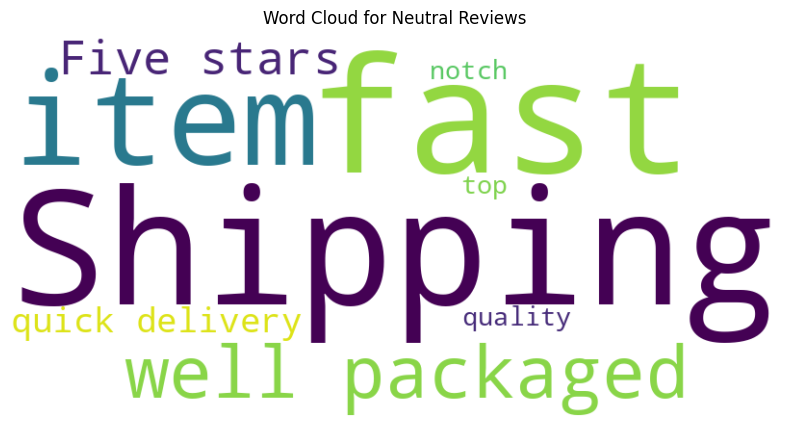

In [71]:
# Neutral Reviews Word Cloud
generate_wordcloud(neutral_reviews, 'Word Cloud for Neutral Reviews')

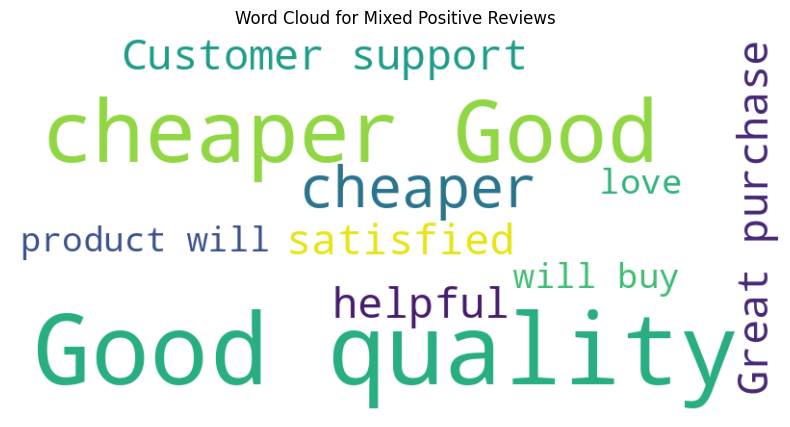

In [72]:
# Mixed Positive Reviews Word Cloud
generate_wordcloud(mixed_positive_reviews, 'Word Cloud for Mixed Positive Reviews')

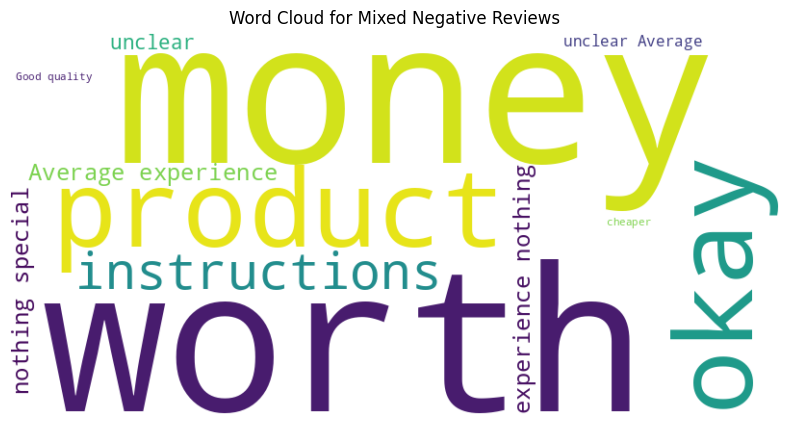

In [73]:
# Mixed Negative Reviews Word Cloud
generate_wordcloud(mixed_negative_reviews, 'Word Cloud for Mixed Negative Reviews')

In [74]:
# Save the DataFrame with sentiment scores, categories, and buckets to a new CSV file
dfcv.to_csv('new_cr.csv', index=False)